In [6]:
from collections import Counter

import matplotlib.pyplot as plt
import pandas as panda
import datetime as dt
import seaborn as sns

In [2]:
df = panda.read_csv('data-test-analytics.csv')

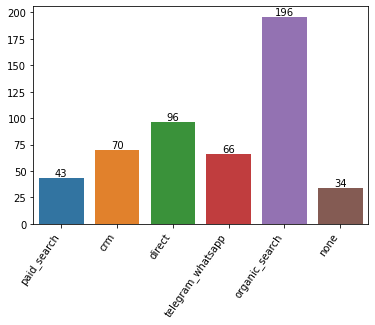

In [17]:
# Definindo as labels para o eixo-x
x_labels = ['paid_search', 'crm', 'direct', 'telegram_whatsapp', 'organic_search', 'none']

# Resgatando todas as linhas de marketing_source onde status é igual a canceled e transformando em lista
all_marketing_by_canceled_list = df.loc[(df['status'] == 'canceled'), 'marketing_source'].tolist()

# Transformando a lista de todos os marketing_source para dictionary
# E agrupando cada canal de marketing pelas suas quantidades nas linhas
all_values_canceled_marketing = dict(Counter(all_marketing_by_canceled_list))

# Resgatando os valores de cada canal de marketing
crm = all_values_canceled_marketing.get("crm")
paid_search = all_values_canceled_marketing.get("paid_search")
direct = all_values_canceled_marketing.get("direct")
telegram_whatsapp = all_values_canceled_marketing.get("telegram_whatsapp")
organic_search = all_values_canceled_marketing.get("organic_search")
none = all_values_canceled_marketing.get("none")

# Preparando em uma variável os valores resgatados para plotar o gráfico
list_marketing_sources_canceled = [crm, paid_search, direct, telegram_whatsapp, organic_search, none]

# Plotando o gráfico para representar os dados obtidos
plot_graph = sns.barplot(x=x_labels, y=list_marketing_sources_canceled)
plt.setp(plot_graph.get_xticklabels(), rotation=55,  ha='right')
plot_graph.bar_label(plot_graph.containers[0])
plt.show()

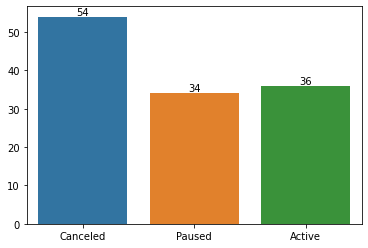

In [21]:
# Funcao auxiliar para resgatar o valor que mais se repete na lista
def most_frequent(List):
    return max(set(List), key = List.count)

# Resgatando os valores de recency em relacao a cada status possivel
all_canceled_recency = df.loc[(df['status'] == 'canceled'), 'recency'].tolist()
all_paused_recency = df.loc[(df['status'] == 'paused'), 'recency'].tolist()
all_active_recency = df.loc[(df['status'] == 'active'), 'recency'].tolist()

# Labels para o eixo-x
x_labels = ['Canceled', 'Paused', 'Active']

# Calculando o valor da moda em cada status (o valor que mais se repete)
mode_canceled = most_frequent(all_canceled_recency)
mode_paused = most_frequent(all_paused_recency)
mode_active = most_frequent(all_active_recency)

# Plotando o grafico em cima dos dados obtidos
mode_graph_values = [mode_canceled, mode_paused, mode_active]
plot_graph = sns.barplot(x=x_labels, y=mode_graph_values)
plot_graph.bar_label(plot_graph.containers[0])
plt.show()